In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import trapz
from sympy import symbols, solve
import scipy.special as spc
import pandas as pd
from scipy import interpolate

In [2]:
Mgstar=-20.30
Mgsun=5.12
Mglow=-16.01
Mghigh=-24.09
Phigstar= 1.25e-2
alpha= -1.10
def Mag2Lumi(m):
    return 10**(-0.4*(m-Mgsun))

Lgstar=Mag2Lumi(Mgstar)
Lglow=Mag2Lumi(Mglow)
Lghigh=Mag2Lumi(Mghigh)

def LumiDensity(l):
     return l**(alpha)*Phigstar*(1/Lgstar)**(alpha+1)*np.exp(-l/Lgstar)
    
    
ldens, ldenserr = quad(LumiDensity, Lglow, Lghigh)

def LumitotInt(l):
    return l*LumiDensity(l)

ltot, ltoterr = quad(LumitotInt, Lglow, Lghigh)
print("Total Luminosity Density in g-band = ",ltot, "+-", ltoterr)

AvgLumi=ltot/ldens
print(AvgLumi)

print(ldens)

Total Luminosity Density in g-band =  190884226.49677026 +- 0.0373006519414929
3643726098.4718184
0.05238709533541153


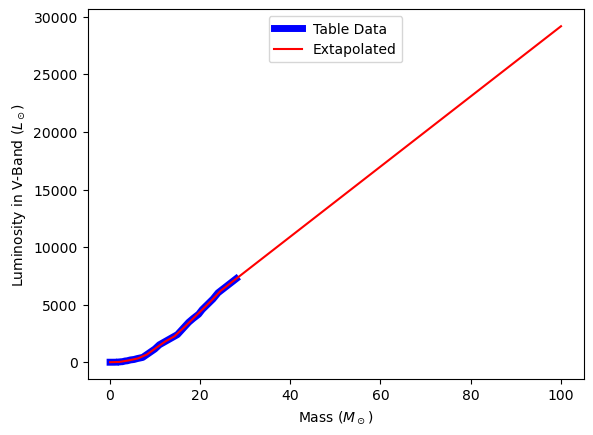

In [3]:
stellarpop=pd.read_excel(r'C:\Users\carte\OneDrive\Desktop\TAMU\Extragalactic Astronomy\HW2\stellar-pop.xlsx')

absMV=np.array(stellarpop['Mv'][6:92], dtype='float64')
absMV=absMV[::-1]
mass=np.array(stellarpop['Msun'][6:92], dtype='float64')
mass=mass[::-1]

LV= np.empty(86, dtype=object) 

for i in range(86):
    LV[i]=10**(-0.4*(absMV[i]-4.85))
    

LVfunc = interpolate.interp1d(mass, LV, fill_value='extrapolate')

mrange=np.linspace(0.08,100,50)
plt.plot(mass,LV, 'b', linewidth=5, label="Table Data")
plt.plot(mrange,LVfunc(mrange), 'r', label="Extapolated")
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Luminosity in V-Band ($L_\odot$)')
plt.legend(loc='upper center')

In [4]:
def Lmtot_Salpeter_Int(m, a=2.35):
    return LVfunc(m)*m**(-a)

def mdens_Salpeter_Int(m, a=2.35):
    return m**(-a)

Lmtot_Salpeter,  Lmtot_Salpetererr = quad(Lmtot_Salpeter_Int, 0.08, 100, limit=1000)
mdens_Salpeter,  mdens_Salpetererr = quad(mdens_Salpeter_Int, 0.08, 100)


Lavg=Lmtot_Salpeter/mdens_Salpeter
print(Lavg)

8.99018915908015


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\1904429891.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Lmtot_Salpeter,  Lmtot_Salpetererr = quad(Lmtot_Salpeter_Int, 0.08, 100, limit=1000)


In [5]:
def Lmtot_KroupaHigh_Int(m, a=2.3):
    return LVfunc(m)*m**(-a)

def mdens_KroupaHigh_Int(m, a=2.3):
    return m**(-a)

def Lmtot_KroupaLow_Int(m, a=1.3):
    return LVfunc(m)*m**(-a)

def mdens_KroupaLow_Int(m, a=1.3):
    return m**(-a)

Lmtot_KroupaLow,  Lmtot_KroupaLowerr = quad(Lmtot_KroupaLow_Int, 0.08, 0.5, limit=1000)
mdens_KroupaLow,  mdens_KroupaLowerr = quad(mdens_KroupaLow_Int, 0.08, 0.5)
Lmtot_KroupaHigh,  Lmtot_KroupaHigherr = quad(Lmtot_KroupaHigh_Int, 0.5, 100, limit=1000)
mdens_KroupaHigh,  mdens_KroupaHigherr = quad(mdens_KroupaHigh_Int, 0.5, 100)

Lavg=(Lmtot_KroupaLow+Lmtot_KroupaHigh)/(mdens_KroupaLow+mdens_KroupaHigh)
print(Lavg)

48.014343542366184


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\1979232059.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Lmtot_KroupaHigh,  Lmtot_KroupaHigherr = quad(Lmtot_KroupaHigh_Int, 0.5, 100, limit=1000)


In [6]:
def Lmtot_TopHeavy_Int(m, a=1.3):
    return LVfunc(m)*m**(-a)

def mdens_TopHeavy_Int(m, a=1.3):
    return m**(-a)

Lmtot_TopHeavy,  Lmtot_TopHeavyerr = quad(Lmtot_TopHeavy_Int, 0.5, 100, limit=1000)
mdens_TopHeavy,  mdens_TopHeavyerr = quad(mdens_TopHeavy_Int, 0.5, 100)


Lavg=Lmtot_TopHeavy/mdens_TopHeavy
print(Lavg)

2359.367081086803


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3262334844.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Lmtot_TopHeavy,  Lmtot_TopHeavyerr = quad(Lmtot_TopHeavy_Int, 0.5, 100, limit=1000)


In [7]:
def SalpeterIMF(m, a=2.35):
    return m**(-a)

Mstar, Mstarerr = quad(SalpeterIMF, 0.08, 0.55)
Kstar, Kstarerr = quad(SalpeterIMF, 0.56, 0.87)
Gstar, Gstarerr = quad(SalpeterIMF, 0.90, 1.08)
Fstar, Fstarerr = quad(SalpeterIMF, 1.11, 1.59)
Astar, Astarerr = quad(SalpeterIMF, 1.67, 2.3)
Bstar, Bstarerr = quad(SalpeterIMF, 2.5, 17.5)
Ostar, Ostarerr = quad(SalpeterIMF, 18.5, 100)

MKr=Mstar/Kstar
MGr=Mstar/Gstar
MFr=Mstar/Fstar
MAr=Mstar/Astar
MBr=Mstar/Bstar
MOr=Mstar/Ostar

print (MKr,MGr,MFr,MAr,MBr,MOr)

28.568565871059807 111.3809037375964 83.90893800856949 159.56220108787392 104.04311784005537 1603.4155403459363


Text(0.5, 1.0, 'FLAM surface Flux of M5V type star')

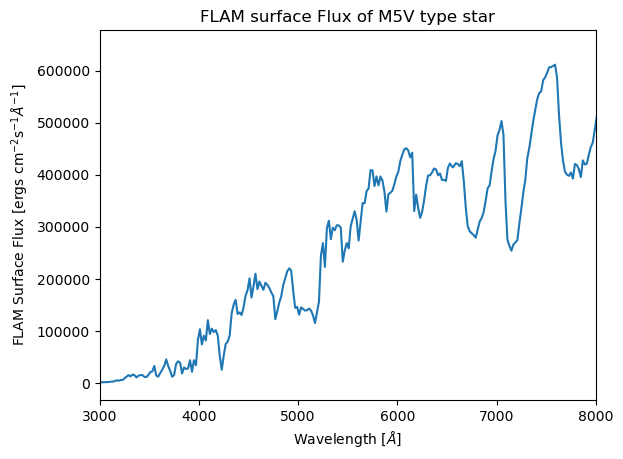

In [8]:


from astropy.io import fits
from astropy.table import Table
 
# M5V       3240     +4.94       kp00_3500[g50]   
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_3500.fits') as kp00_3500:
    kp00_3500_table = Table(kp00_3500[1].data)
M5V_wave = np.array(kp00_3500_table['WAVELENGTH'])
M5V_spec = np.array(kp00_3500_table['g50'])

plt.plot(M5V_wave,M5V_spec)
plt.xlim(3000, 8000)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('FLAM surface Flux of M5V type star')

Text(0.5, 1.0, 'FLAM surface Flux of K5V type star (weighed)')

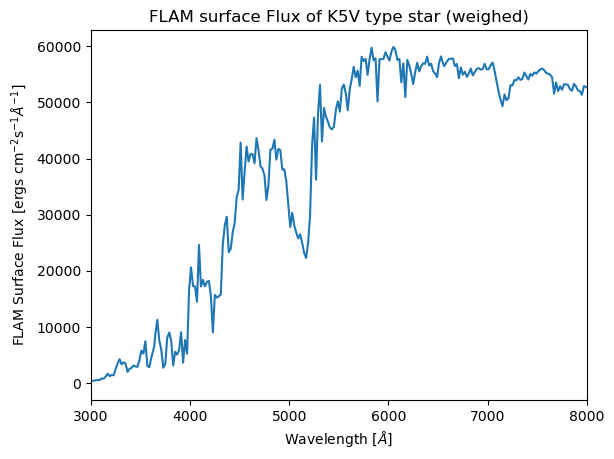

In [9]:
# K5V       4350     +4.54       kp00_4250[g45]

with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_4250.fits') as kp00_4250:
    kp00_4250_table = Table(kp00_4250[1].data)
K5V_wave = np.array(kp00_4250_table['WAVELENGTH'])
K5V_spec = np.array(kp00_4250_table['g45'])/MKr

plt.plot(K5V_wave,K5V_spec)
plt.xlim(3000, 8000)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('FLAM surface Flux of K5V type star (weighed)')

Text(0.5, 1.0, 'FLAM surface Flux of G5V type star (weighed)')

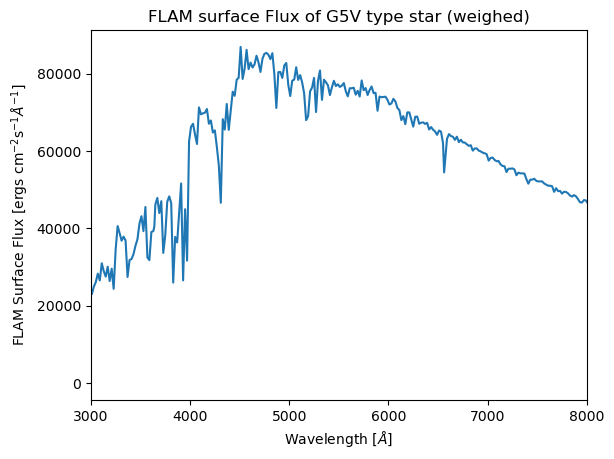

In [10]:
# G5V       5770     +4.49       kp00_5750[g45] 

with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_5750.fits') as kp00_5750:
    kp00_5750_table = Table(kp00_5750[1].data)
G5V_wave = np.array(kp00_5750_table['WAVELENGTH'])
G5V_spec = np.array(kp00_5750_table['g45'])/MGr

plt.plot(G5V_wave,G5V_spec)
plt.xlim(3000, 8000)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('FLAM surface Flux of G5V type star (weighed)')

Text(0.5, 1.0, 'FLAM surface Flux of F5V type star (weighed)')

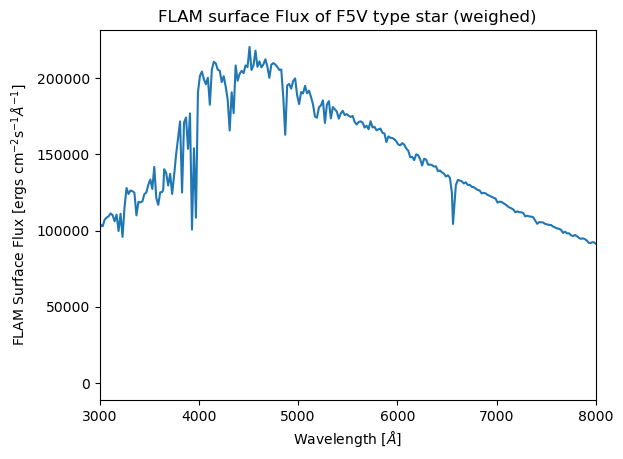

In [11]:
# F5V       6440     +4.34       kp00_6500[g45] 

with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_6500.fits') as kp00_6500:
    kp00_6500_table = Table(kp00_6500[1].data)
F5V_wave = np.array(kp00_6500_table['WAVELENGTH'])
F5V_spec = np.array(kp00_6500_table['g45'])/MFr

plt.plot(F5V_wave,F5V_spec)
plt.xlim(3000, 8000)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('FLAM surface Flux of F5V type star (weighed)')

Text(0.5, 1.0, 'FLAM surface Flux of A5V type star (weighed)')

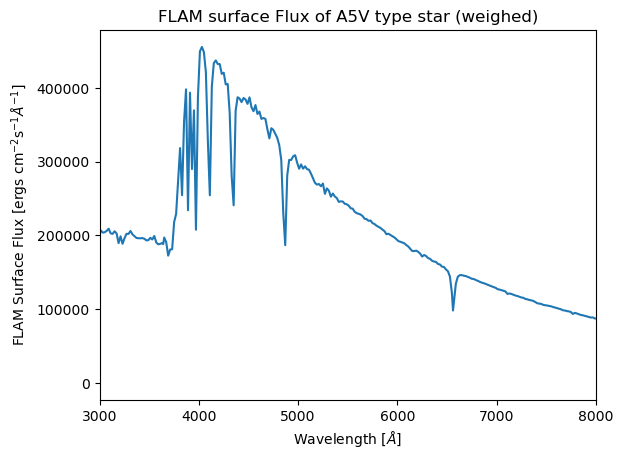

In [12]:
# A5V       8200     +4.29       kp00_8250[g45]

with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_8250.fits') as kp00_8250:
    kp00_8250_table = Table(kp00_8250[1].data)
A5V_wave = np.array(kp00_8250_table['WAVELENGTH'])
A5V_spec = np.array(kp00_8250_table['g45'])/MAr

plt.plot(A5V_wave,A5V_spec)
plt.xlim(3000, 8000)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('FLAM surface Flux of A5V type star (weighed)')

Text(0.5, 1.0, 'FLAM surface Flux of B5V type star (weighed)')

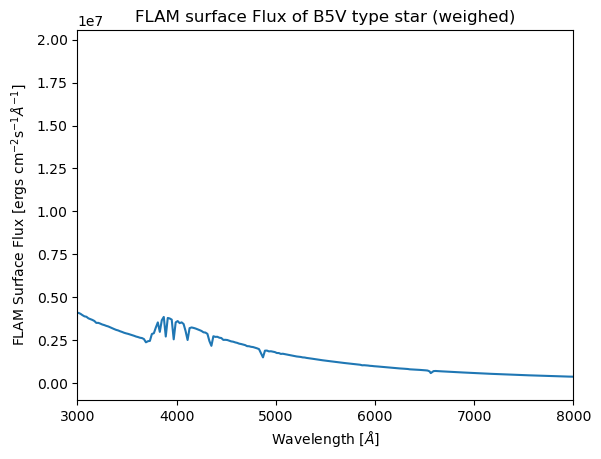

In [13]:
# B5V      15400     +4.04      kp00_15000[g40] 

with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_15000.fits') as kp00_15000:
    kp00_15000_table = Table(kp00_15000[1].data)
B5V_wave = np.array(kp00_15000_table['WAVELENGTH'])
B5V_spec = np.array(kp00_15000_table['g40'])/MBr

plt.plot(B5V_wave,B5V_spec)
plt.xlim(3000, 8000)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('FLAM surface Flux of B5V type star (weighed)')

Text(0.5, 1.0, 'FLAM surface Flux of O5V type star (weighed)')

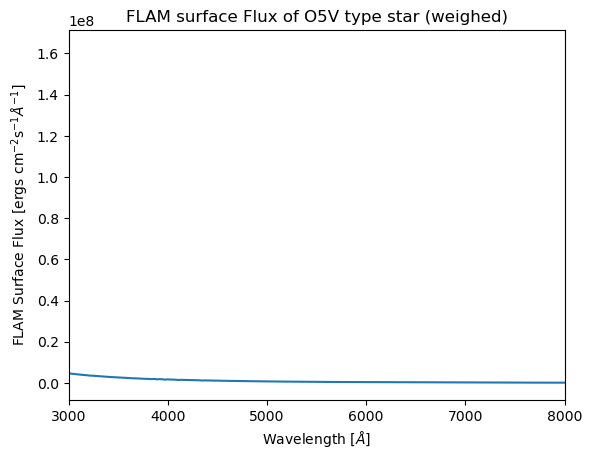

In [14]:
# O5V      44500     +4.04      kp00_45000[g50]


with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_45000.fits') as kp00_45000:
    kp00_45000_table = Table(kp00_45000[1].data)
O5V_wave = np.array(kp00_45000_table['WAVELENGTH'])
O5V_spec = np.array(kp00_45000_table['g50'])/MOr

plt.plot(O5V_wave,O5V_spec)
plt.xlim(3000, 8000)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('FLAM surface Flux of O5V type star (weighed)')

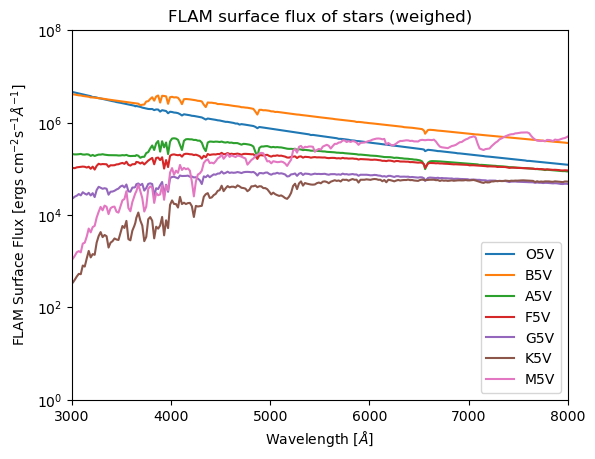

In [24]:
plt.plot(O5V_wave,O5V_spec, label="O5V")
plt.plot(B5V_wave,B5V_spec, label="B5V")
plt.plot(A5V_wave,A5V_spec, label="A5V")
plt.plot(F5V_wave,F5V_spec, label="F5V")
plt.plot(G5V_wave,G5V_spec, label="G5V")
plt.plot(K5V_wave,K5V_spec, label="K5V")
plt.plot(M5V_wave,M5V_spec, label="M5V")
plt.xlim(3000, 8000)
plt.ylim(1, 1e+8)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('FLAM surface flux of stars (weighed)')
plt.yscale("log")
leg = plt.legend(loc='lower right')

(3000.0, 8000.0)

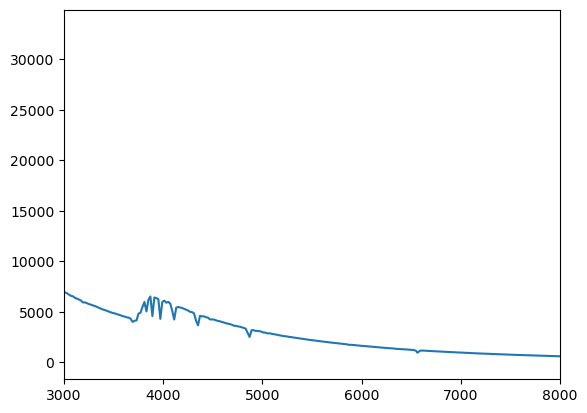

In [117]:
Lsun=3.846e+33
Msun=1.989e+30


O5Vlumi= 790000 
O5V_spec_norm=O5V_spec/O5Vlumi

B5Vlumi= 589
B5V_spec_norm=B5V_spec/B5Vlumi

A5Vlumi= 12.3
A5V_spec_norm=A5V_spec/A5Vlumi

F5Vlumi= 3.63
F5V_spec_norm=F5V_spec/F5Vlumi

G5Vlumi= 0.89
G5V_spec_norm=G5V_spec/G5Vlumi

K5Vmass= 0.68
normK5V= (Msun)/(K5Vmass*Lsun)
K5V_spec_norm=K5V_spec*normK5V

M5Vmass= 0.16
normM5V= (Msun)/(M5Vmass*Lsun)
M5V_spec_norm=M5V_spec*normM5V

plt.plot(O5V_wave,B5V_spec_norm)
plt.xlim(3000, 8000)

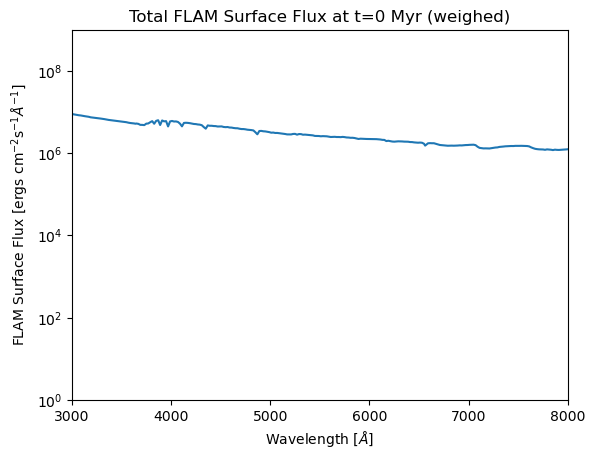

In [98]:
spec_tot_0 = np.array([O5V_spec,B5V_spec,A5V_spec,F5V_spec,G5V_spec,K5V_spec,M5V_spec]).sum(axis=0)

plt.plot(O5V_wave,spec_tot_0)
plt.xlim(3000, 8000)
plt.ylim(1, 1e+9)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('Total FLAM Surface Flux at t=0 Myr (weighed)')
plt.yscale("log")

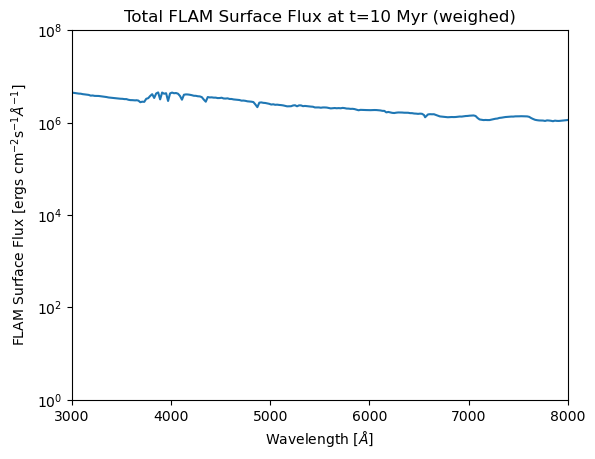

In [100]:
spec_tot_10M = np.array([B5V_spec,A5V_spec,F5V_spec,G5V_spec,K5V_spec,M5V_spec]).sum(axis=0)

plt.plot(O5V_wave,spec_tot_10M)
plt.xlim(3000, 8000)
plt.ylim(1, 1e+8)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('Total FLAM Surface Flux at t=10 Myr (weighed)')
plt.yscale("log")

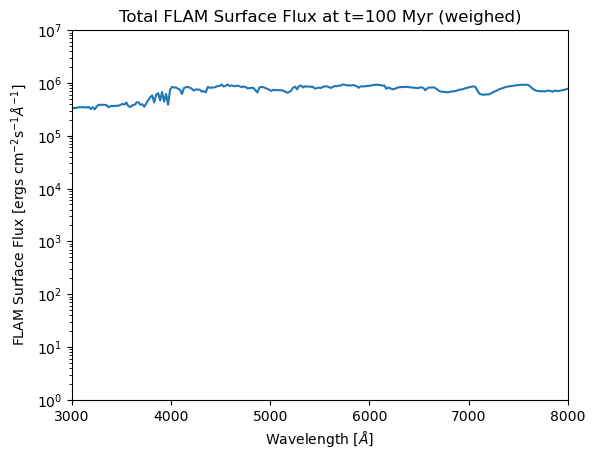

In [102]:
spec_tot_100M = np.array([A5V_spec,F5V_spec,G5V_spec,K5V_spec,M5V_spec]).sum(axis=0)

plt.plot(O5V_wave,spec_tot_100M)
plt.xlim(3000, 8000)
plt.ylim(1, 1e+7)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('Total FLAM Surface Flux at t=100 Myr (weighed)')
plt.yscale("log")

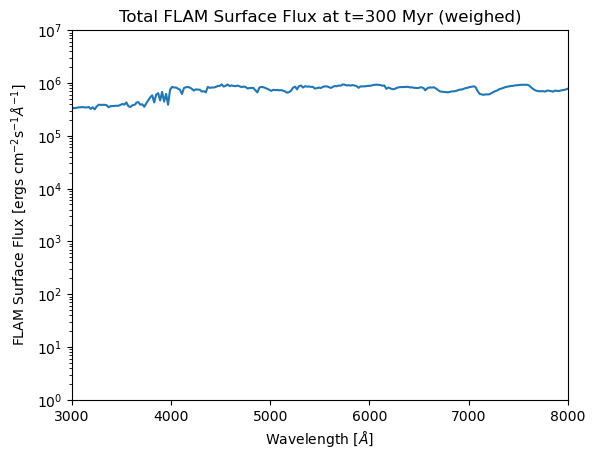

In [103]:
spec_tot_300M = np.array([A5V_spec,F5V_spec,G5V_spec,K5V_spec,M5V_spec]).sum(axis=0)

plt.plot(O5V_wave,spec_tot_300M)
plt.xlim(3000, 8000)
plt.ylim(1, 1e+7)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('Total FLAM Surface Flux at t=300 Myr (weighed)')
plt.yscale("log")

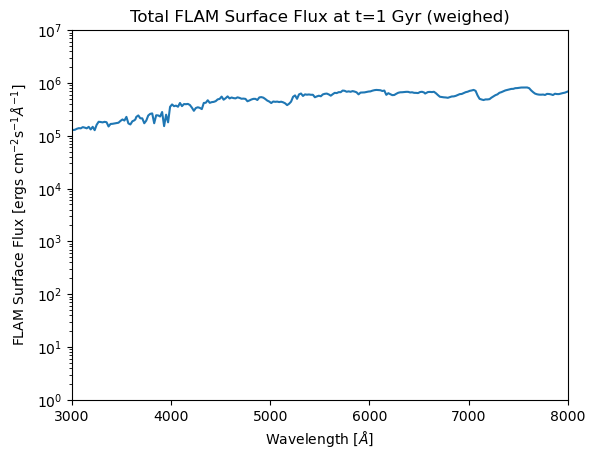

In [106]:
spec_tot_1G = np.array([F5V_spec,G5V_spec,K5V_spec,M5V_spec]).sum(axis=0)

plt.plot(O5V_wave,spec_tot_1G)
plt.xlim(3000, 8000)
plt.ylim(1, 1e+7)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('Total FLAM Surface Flux at t=1 Gyr (weighed)')
plt.yscale("log")

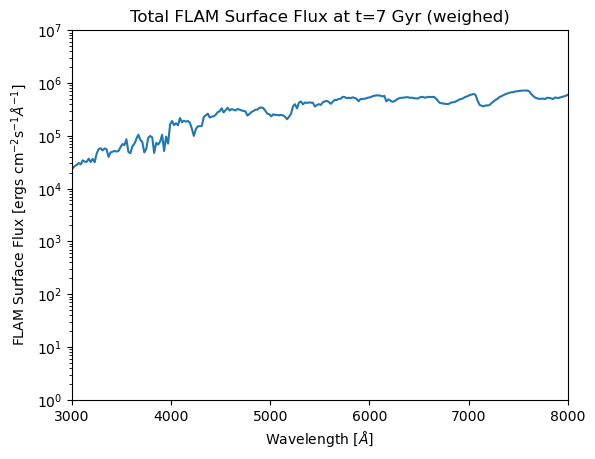

In [109]:
spec_tot_7G = np.array([G5V_spec,K5V_spec,M5V_spec]).sum(axis=0)

plt.plot(O5V_wave,spec_tot_7G)
plt.xlim(3000, 8000)
plt.ylim(1, 1e+7)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('Total FLAM Surface Flux at t=7 Gyr (weighed)')
plt.yscale("log")

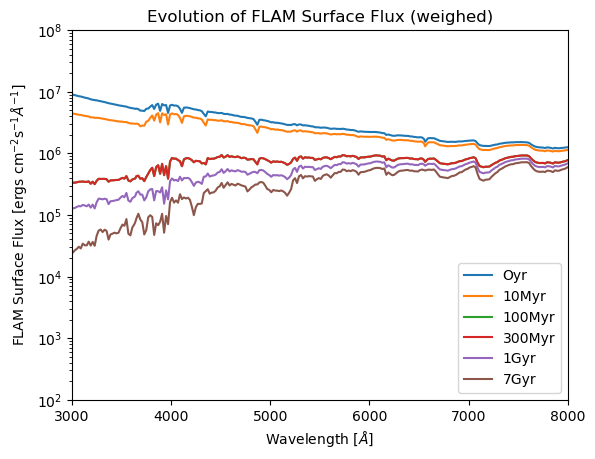

In [120]:
plt.plot(O5V_wave,spec_tot_0, label="Oyr")
plt.plot(B5V_wave,spec_tot_10M, label="10Myr")
plt.plot(A5V_wave,spec_tot_100M, label="100Myr")
plt.plot(F5V_wave,spec_tot_300M, label="300Myr")
plt.plot(G5V_wave,spec_tot_1G, label="1Gyr")
plt.plot(K5V_wave,spec_tot_7G, label="7Gyr")
plt.xlim(3000, 8000)
plt.ylim(100, 1e+8)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('FLAM Surface Flux [ergs cm$^{-2}$s$^{-1}\AA^{-1}$]')
plt.title('Evolution of FLAM Surface Flux (weighed)')
plt.yscale("log")
leg = plt.legend(loc='lower right')

Text(0, 0.5, 'Filter Sensitivity')

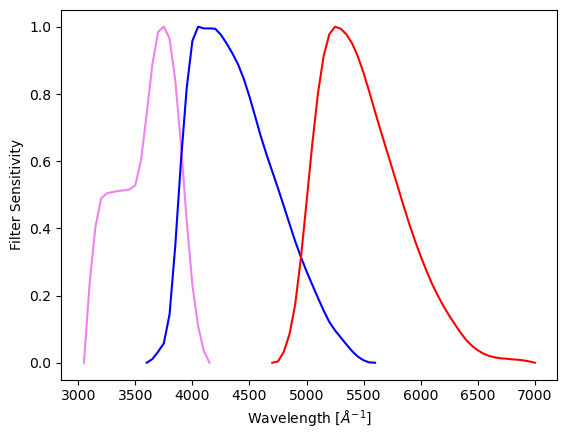

In [123]:
width = 50 #Angstroms
baseU = 3050 #Angstroms
baseB = 3600 #Angstroms
baseV = 4700 #Angstroms

UWave = []
BWave = []
VWave = []

for i  in range(0,23):
  UWave.append(baseU + (float(i)*width))

    
USens = [0,0.237,0.403,0.489,0.504,0.508,0.511,0.513,0.516,0.528,0.603,0.741,0.889,0.985,1,0.965,0.841,0.648,0.424,0.231,0.109,0.035,0]



for i  in range(0,41):
  BWave.append(baseB + (float(i)*width))

    
BSens = [0,0.011,0.033,0.058,0.144,0.348,0.601,0.817,0.958,1,0.995,0.995,0.994,0.976,0.95,0.921,0.888,0.845,0.792,0.733,0.673,0.619,0.569,0.519,0.467,0.414,0.362,0.315,0.272,0.232,0.193,0.155,0.121,0.096,0.075,0.054,0.034,0.018,0.007,0.001,0]



for i  in range(0,47):
  VWave.append(baseV + (float(i)*width))


VSens = [0,0.004,0.032,0.084,0.172,0.31,0.478,0.65,0.802,0.913,0.978,1,0.994,0.977,0.95,0.911,0.862,0.806,0.747,0.69,0.634,0.579,0.523,0.467,0.413,0.363,0.317,0.274,0.234,0.2,0.168,0.14,0.114,0.089,0.067,0.05,0.037,0.027,0.02,0.016,0.013,0.012,0.01,0.009,0.007,0.004,0]

plt.plot(UWave, USens, color="violet")
plt.plot(BWave, BSens, color="blue")
plt.plot(VWave, VSens, color="red")
plt.xlabel("Wavelength [$\AA^{-1}$]")
plt.ylabel("Filter Sensitivity")

In [186]:
T0_int = interpolate.interp1d(O5V_wave,spec_tot_0, fill_value='extrapolate')
T10M_int = interpolate.interp1d(O5V_wave,spec_tot_10M, fill_value='extrapolate')
T100M_int = interpolate.interp1d(O5V_wave,spec_tot_100M, fill_value='extrapolate')
T300M_int = interpolate.interp1d(O5V_wave,spec_tot_300M, fill_value='extrapolate')
T1G_int = interpolate.interp1d(O5V_wave,spec_tot_1G, fill_value='extrapolate')
T7G_int = interpolate.interp1d(O5V_wave,spec_tot_7G, fill_value='extrapolate')
Ufilt_int = interpolate.interp1d(UWave, USens, fill_value='extrapolate')
Bfilt_int = interpolate.interp1d(BWave, BSens, fill_value='extrapolate')
Vfilt_int = interpolate.interp1d(VWave, VSens, fill_value='extrapolate')


In [190]:
def T0_U_Num(l):
    return T0_int(l)*Ufilt_int(l)
def T0_U_Den(l):
    return Ufilt_int(l)

T0_U_Num,  T0_U_Numerr = quad(T0_U_Num, 3050, 4150, limit=1000)
T0_U_Den,  T0_U_Denerr = quad(T0_U_Den, 3050, 4150, limit=1000)
T0_U = T0_U_Num/T0_U_Den

def T0_B_Num(l):
    return T0_int(l)*Bfilt_int(l)
def T0_B_Den(l):
    return Bfilt_int(l)

T0_B_Num,  T0_B_Numerr = quad(T0_B_Num, 3050, 4150, limit=1000)
T0_B_Den,  T0_B_Denerr = quad(T0_B_Den, 3600, 5600, limit=1000)
T0_B = T0_B_Num/T0_B_Den

def T0_V_Num(l):
    return T0_int(l)*Vfilt_int(l)
def T0_V_Den(l):
    return Vfilt_int(l)

T0_V_Num,  T0_V_Numerr = quad(T0_V_Num, 4700, 7000, limit=1000)
T0_V_Den,  T0_V_Denerr = quad(T0_V_Den, 4700, 7000, limit=1000)
T0_V = T0_V_Num/T0_V_Den

T0_U_B=-2.5*np.log10(T0_U/T0_B)
T0_B_V=-2.5*np.log10(T0_B/T0_V)

print("U-B = " + str(T0_U_B))
print("B-V = " + str(T0_B_V))

C:\Users\carte\AppData\Local\Temp\ipykernel_18392\2893750291.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T0_U_Num,  T0_U_Numerr = quad(T0_U_Num, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\2893750291.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T0_U_Den,  T0_U_Denerr = quad(T0_U_Den, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\2893750291.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T0_B_Num,  T0_B_Numerr = quad(T0_B_Num, 3050, 4150, limit=1000)


U-B = -1.5647133575257515
B-V = 0.6960885263957846


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\2893750291.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T0_V_Num,  T0_V_Numerr = quad(T0_V_Num, 4700, 7000, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\2893750291.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T0_V_Den,  T0_V_Denerr = quad(T0_V_Den, 4700, 7000, limit=1000)


In [191]:
def T10M_U_Num(l):
    return T10M_int(l)*Ufilt_int(l)
def T10M_U_Den(l):
    return Ufilt_int(l)

T10M_U_Num,  T10M_U_Numerr = quad(T10M_U_Num, 3050, 4150, limit=1000)
T10M_U_Den,  T10M_U_Denerr = quad(T10M_U_Den, 3050, 4150, limit=1000)
T10M_U = T10M_U_Num/T10M_U_Den

def T10M_B_Num(l):
    return T10M_int(l)*Bfilt_int(l)
def T10M_B_Den(l):
    return Bfilt_int(l)

T10M_B_Num,  T10M_B_Numerr = quad(T10M_B_Num, 3050, 4150, limit=1000)
T10M_B_Den,  T10M_B_Denerr = quad(T10M_B_Den, 3600, 5600, limit=1000)
T10M_B = T10M_B_Num/T10M_B_Den

def T10M_V_Num(l):
    return T10M_int(l)*Vfilt_int(l)
def T10M_V_Den(l):
    return Vfilt_int(l)

T10M_V_Num,  T10M_V_Numerr = quad(T10M_V_Num, 4700, 7000, limit=1000)
T10M_V_Den,  T10M_V_Denerr = quad(T10M_V_Den, 4700, 7000, limit=1000)
T10M_V = T10M_V_Num/T10M_V_Den

T10M_U_B=-2.5*np.log10(T10M_U/T10M_B)
T10M_B_V=-2.5*np.log10(T10M_B/T10M_V)

print("U-B = " + str(T10M_U_B))
print("B-V = " + str(T10M_B_V))

C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3108505165.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T10M_U_Num,  T10M_U_Numerr = quad(T10M_U_Num, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3108505165.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T10M_U_Den,  T10M_U_Denerr = quad(T10M_U_Den, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3108505165.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T10M_B_Num,  T10M_B_Numerr = quad(T10M_B_Num, 3050, 4150, limit=1000)


U-B = -1.3095225941826671
B-V = 0.7829856107906281


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3108505165.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T10M_V_Num,  T10M_V_Numerr = quad(T10M_V_Num, 4700, 7000, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3108505165.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T10M_V_Den,  T10M_V_Denerr = quad(T10M_V_Den, 4700, 7000, limit=1000)


In [192]:
def T100M_U_Num(l):
    return T100M_int(l)*Ufilt_int(l)
def T100M_U_Den(l):
    return Ufilt_int(l)

T100M_U_Num,  T100M_U_Numerr = quad(T100M_U_Num, 3050, 4150, limit=1000)
T100M_U_Den,  T100M_U_Denerr = quad(T100M_U_Den, 3050, 4150, limit=1000)
T100M_U = T100M_U_Num/T100M_U_Den

def T100M_B_Num(l):
    return T100M_int(l)*Bfilt_int(l)
def T100M_B_Den(l):
    return Bfilt_int(l)

T100M_B_Num,  T100M_B_Numerr = quad(T100M_B_Num, 3050, 4150, limit=1000)
T100M_B_Den,  T100M_B_Denerr = quad(T100M_B_Den, 3600, 5600, limit=1000)
T100M_B = T100M_B_Num/T100M_B_Den

def T100M_V_Num(l):
    return T100M_int(l)*Vfilt_int(l)
def T100M_V_Den(l):
    return Vfilt_int(l)

T100M_V_Num,  T100M_V_Numerr = quad(T100M_V_Num, 4700, 7000, limit=1000)
T100M_V_Den,  T100M_V_Denerr = quad(T100M_V_Den, 4700, 7000, limit=1000)
T100M_V = T100M_V_Num/T100M_V_Den

T100M_U_B=-2.5*np.log10(T100M_U/T100M_B)
T100M_B_V=-2.5*np.log10(T100M_B/T100M_V)

print("U-B = " + str(T100M_U_B))
print("B-V = " + str(T100M_B_V))

C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3897252924.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T100M_U_Num,  T100M_U_Numerr = quad(T100M_U_Num, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3897252924.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T100M_U_Den,  T100M_U_Denerr = quad(T100M_U_Den, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3897252924.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T100M_B_Num,  T100M_B_Numerr = quad(T100M_B_Num, 3050, 4150, limit=1000)


U-B = -0.897112272980237
B-V = 1.5879893291037686


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3897252924.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T100M_V_Num,  T100M_V_Numerr = quad(T100M_V_Num, 4700, 7000, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\3897252924.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T100M_V_Den,  T100M_V_Denerr = quad(T100M_V_Den, 4700, 7000, limit=1000)


In [193]:
def T300M_U_Num(l):
    return T300M_int(l)*Ufilt_int(l)
def T300M_U_Den(l):
    return Ufilt_int(l)

T300M_U_Num,  T300M_U_Numerr = quad(T300M_U_Num, 3050, 4150, limit=1000)
T300M_U_Den,  T300M_U_Denerr = quad(T300M_U_Den, 3050, 4150, limit=1000)
T300M_U = T300M_U_Num/T300M_U_Den

def T300M_B_Num(l):
    return T300M_int(l)*Bfilt_int(l)
def T300M_B_Den(l):
    return Bfilt_int(l)

T300M_B_Num,  T300M_B_Numerr = quad(T300M_B_Num, 3050, 4150, limit=1000)
T300M_B_Den,  T300M_B_Denerr = quad(T300M_B_Den, 3600, 5600, limit=1000)
T300M_B = T300M_B_Num/T300M_B_Den

def T300M_V_Num(l):
    return T300M_int(l)*Vfilt_int(l)
def T300M_V_Den(l):
    return Vfilt_int(l)

T300M_V_Num,  T300M_V_Numerr = quad(T300M_V_Num, 4700, 7000, limit=1000)
T300M_V_Den,  T300M_V_Denerr = quad(T300M_V_Den, 4700, 7000, limit=1000)
T300M_V = T300M_V_Num/T300M_V_Den

T300M_U_B=-2.5*np.log10(T300M_U/T300M_B)
T300M_B_V=-2.5*np.log10(T300M_B/T300M_V)

print("U-B = " + str(T300M_U_B))
print("B-V = " + str(T300M_B_V))

C:\Users\carte\AppData\Local\Temp\ipykernel_18392\833018122.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T300M_U_Num,  T300M_U_Numerr = quad(T300M_U_Num, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\833018122.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T300M_U_Den,  T300M_U_Denerr = quad(T300M_U_Den, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\833018122.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T300M_B_Num,  T300M_B_Numerr = quad(T300M_B_Num, 3050, 4150, limit=1000)


U-B = -0.897112272980237
B-V = 1.5879893291037686


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\833018122.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T300M_V_Num,  T300M_V_Numerr = quad(T300M_V_Num, 4700, 7000, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\833018122.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T300M_V_Den,  T300M_V_Denerr = quad(T300M_V_Den, 4700, 7000, limit=1000)


In [194]:
def T1G_U_Num(l):
    return T1G_int(l)*Ufilt_int(l)
def T1G_U_Den(l):
    return Ufilt_int(l)

T1G_U_Num,  T1G_U_Numerr = quad(T1G_U_Num, 3050, 4150, limit=1000)
T1G_U_Den,  T1G_U_Denerr = quad(T1G_U_Den, 3050, 4150, limit=1000)
T1G_U = T1G_U_Num/T1G_U_Den

def T1G_B_Num(l):
    return T1G_int(l)*Bfilt_int(l)
def T1G_B_Den(l):
    return Bfilt_int(l)

T1G_B_Num,  T1G_B_Numerr = quad(T1G_B_Num, 3050, 4150, limit=1000)
T1G_B_Den,  T1G_B_Denerr = quad(T1G_B_Den, 3600, 5600, limit=1000)
T1G_B = T1G_B_Num/T1G_B_Den

def T1G_V_Num(l):
    return T1G_int(l)*Vfilt_int(l)
def T1G_V_Den(l):
    return Vfilt_int(l)

T1G_V_Num,  T1G_V_Numerr = quad(T1G_V_Num, 4700, 7000, limit=1000)
T1G_V_Den,  T1G_V_Denerr = quad(T1G_V_Den, 4700, 7000, limit=1000)
T1G_V = T1G_V_Num/T1G_V_Den

T1G_U_B=-2.5*np.log10(T1G_U/T1G_B)
T1G_B_V=-2.5*np.log10(T1G_B/T1G_V)

print("U-B = " + str(T1G_U_B))
print("B-V = " + str(T1G_B_V))

C:\Users\carte\AppData\Local\Temp\ipykernel_18392\13889164.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T1G_U_Num,  T1G_U_Numerr = quad(T1G_U_Num, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\13889164.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T1G_U_Den,  T1G_U_Denerr = quad(T1G_U_Den, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\13889164.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T1G_B_Num,  T1G_B_Numerr = quad(T1G_B_Num, 3050, 4150, limit=1000)


U-B = -0.8901269561768916
B-V = 2.0241348243650528


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\13889164.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T1G_V_Num,  T1G_V_Numerr = quad(T1G_V_Num, 4700, 7000, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\13889164.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T1G_V_Den,  T1G_V_Denerr = quad(T1G_V_Den, 4700, 7000, limit=1000)


In [195]:
def T7G_U_Num(l):
    return T7G_int(l)*Ufilt_int(l)
def T7G_U_Den(l):
    return Ufilt_int(l)

T7G_U_Num,  T7G_U_Numerr = quad(T7G_U_Num, 3050, 4150, limit=1000)
T7G_U_Den,  T7G_U_Denerr = quad(T7G_U_Den, 3050, 4150, limit=1000)
T7G_U = T7G_U_Num/T7G_U_Den

def T7G_B_Num(l):
    return T7G_int(l)*Bfilt_int(l)
def T7G_B_Den(l):
    return Bfilt_int(l)

T7G_B_Num,  T7G_B_Numerr = quad(T7G_B_Num, 3050, 4150, limit=1000)
T7G_B_Den,  T7G_B_Denerr = quad(T7G_B_Den, 3600, 5600, limit=1000)
T7G_B = T7G_B_Num/T7G_B_Den

def T7G_V_Num(l):
    return T7G_int(l)*Vfilt_int(l)
def T7G_V_Den(l):
    return Vfilt_int(l)

T7G_V_Num,  T7G_V_Numerr = quad(T7G_V_Num, 4700, 7000, limit=1000)
T7G_V_Den,  T7G_V_Denerr = quad(T7G_V_Den, 4700, 7000, limit=1000)
T7G_V = T7G_V_Num/T7G_V_Den

T7G_U_B=-2.5*np.log10(T7G_U/T7G_B)
T7G_B_V=-2.5*np.log10(T7G_B/T7G_V)

print("U-B = " + str(T7G_U_B))
print("B-V = " + str(T7G_B_V))

C:\Users\carte\AppData\Local\Temp\ipykernel_18392\1217610060.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T7G_U_Num,  T7G_U_Numerr = quad(T7G_U_Num, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\1217610060.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T7G_U_Den,  T7G_U_Denerr = quad(T7G_U_Den, 3050, 4150, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\1217610060.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T7G_B_Num,  T7G_B_Numerr = quad(T7G_B_Num, 3050, 4150, limit=1000)


U-B = -0.567479896793553
B-V = 2.493458007830935


C:\Users\carte\AppData\Local\Temp\ipykernel_18392\1217610060.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T7G_V_Num,  T7G_V_Numerr = quad(T7G_V_Num, 4700, 7000, limit=1000)
C:\Users\carte\AppData\Local\Temp\ipykernel_18392\1217610060.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  T7G_V_Den,  T7G_V_Denerr = quad(T7G_V_Den, 4700, 7000, limit=1000)


Text(0, 0.5, 'B-V')

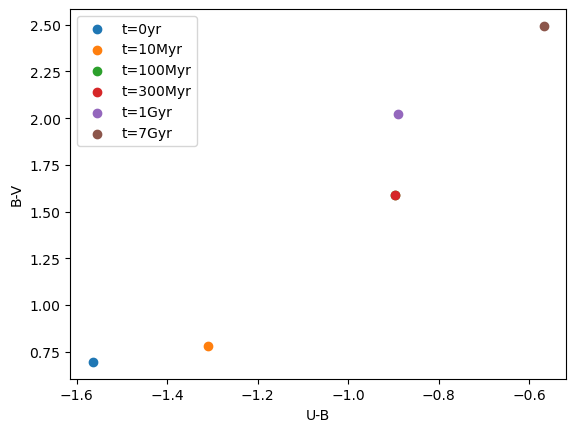

In [206]:
plt.scatter(T0_U_B,T0_B_V, label='t=0yr')
plt.scatter(T10M_U_B,T10M_B_V, label='t=10Myr')
plt.scatter(T100M_U_B,T100M_B_V, label='t=100Myr')
plt.scatter(T300M_U_B,T300M_B_V, label='t=300Myr')
plt.scatter(T1G_U_B,T1G_B_V, label='t=1Gyr')
plt.scatter(T7G_U_B,T7G_B_V, label='t=7Gyr')
leg = plt.legend(loc='upper left')
plt.xlabel('U-B')
plt.ylabel('B-V')